# Exponentially Weighted Average

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
input_len = 1000
min_val = 0
max_val = 4 * np.pi
x = np.arange(min_val, max_val, (max_val - min_val)/input_len, dtype=np.float32)
y = np.sin(x) + np.random.randn(input_len) * 0.3

In [3]:
def weighted_avgerage(arr, beta=0.9, should_correct_bias=True):
    size = np.size(arr)
    result = np.zeros(size, dtype=np.float32)
    for idx in range(size):
        wa_last = 0 if idx == 0 else result[idx - 1]
        result[idx] = beta * wa_last + (1 - beta) * arr[idx]
    if should_correct_bias:
        result /= (1 - np.power(1 - beta, np.arange(size) + 1))
    return result

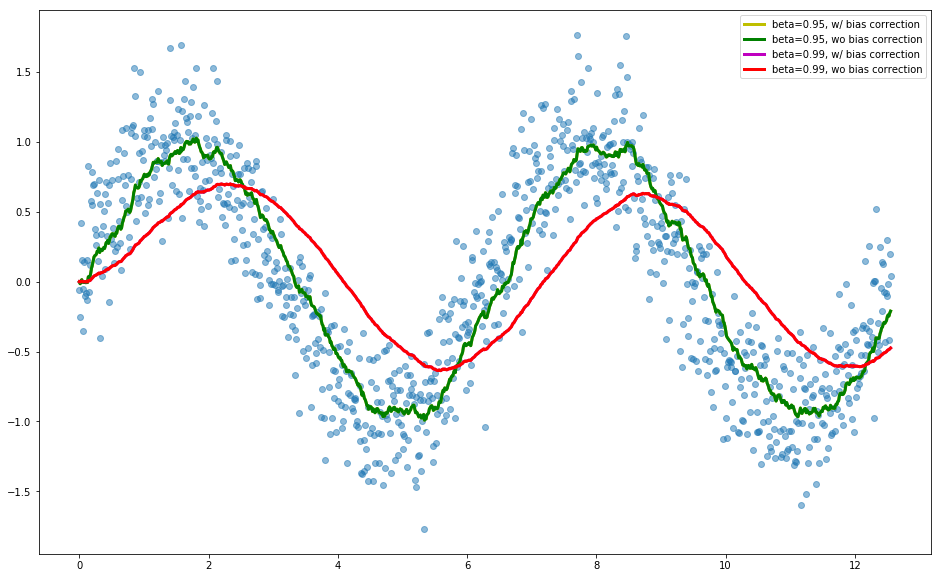

In [4]:
plt.figure(figsize=(16, 10))
plt.scatter(x, y, alpha=0.5)
line_95_not_biased, = plt.plot(x, weighted_avgerage(y, 0.95), 'y', linewidth=3, label='beta=0.95, w/ bias correction')
line_95_biased, = plt.plot(x, weighted_avgerage(y, 0.95, False), 'g', linewidth=3, label='beta=0.95, wo bias correction')
line_99_not_biased, = plt.plot(x, weighted_avgerage(y, 0.99), 'm', linewidth=3, label='beta=0.99, w/ bias correction')
line_99_biased, = plt.plot(x, weighted_avgerage(y, 0.99, False), 'r', linewidth=3, label='beta=0.99, wo bias correction')

# Set ylim to handle skewed plots (if bias correction is not right)
y_lim_buffer = (np.max(y) - np.min(y)) * 0.05
plt.ylim((np.min(y) - y_lim_buffer, np.max(y) + y_lim_buffer))
plt.legend(handles=[line_95_not_biased, line_95_biased, line_99_not_biased, line_99_biased])
plt.show()

## Conclusion

Bias correction doesn't really matter.